<a href="https://colab.research.google.com/github/noahnisbet/DS-Unit-4-Sprint-1-NLP/blob/main/LS_DS20_421_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

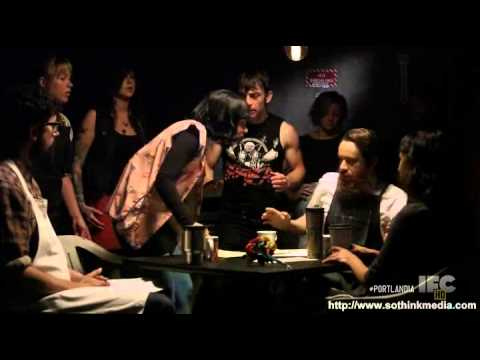

In [31]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [32]:
%pwd

'/content'

In [33]:
import pandas as pd
import spacy
!python -m spacy download en_core_web_lg

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [34]:
# Start here 

In [35]:
nlp = spacy.load('en_core_web_lg')

In [53]:
STOP_WORDS = nlp.Defaults.stop_words

In [37]:
import re

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    # remove non-alphaunmeric
    text = re.sub('(?:(?:[0-9]{2}[:\/,]){2}[0-9]{2,4})', '', text)
    text = re.sub('(?:(?:[0-9]{2}[:\/,])[0-9][:\/,][0-9]{2,4})', '', text)
    text = re.sub('(?:(?:[0-9][:\/,])[0-9]{2}[:\/,][0-9]{2,4})', '', text)
    text = re.sub('(?:(?:[0-9][:\/,])[0-9][:\/,][0-9]{2,4})', '', text)

    text = re.sub('[^a-zA-Z 0-9]', '', text)
    
    # make all text lower case
    text = text.lower()
    # split into tokens using whitespaces 
    tokens = text.split(" ")
    
    return tokens

def to_number(text):
  text = re.sub('[A-Z]*[a-z]*', '', text)
  text = re.sub(' ', '', text)
  text = float(text)
  return text


In [38]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)


In [39]:
shops['rating'] = shops['star_rating'].apply(to_number)

In [40]:
shops['rating'][0]

5.0

In [41]:
shops['tokens']

0       [, , 1, checkin, love, love, loved, the, atmos...
1       [, , listed, in, date, night, austin, ambiance...
2       [, , 1, checkin, listed, in, brunch, spots, i,...
3       [, , very, cool, decor, good, drinks, nice, se...
4       [, , 1, checkin, they, are, located, within, t...
                              ...                        
7611    [, , i, actually, step, into, this, restaurant...
7612    [, , ok, the, steeping, room, is, awesome, how...
7613    [, , loved, coming, here, for, tea, and, the, ...
7614    [, , the, food, is, just, average, the, booths...
7615    [, , i, finally, stopped, in, for, lunch, with...
Name: tokens, Length: 7616, dtype: object

In [88]:
tokens = []

""" Update those tokens w/o stopwords"""
for item in shops['tokens']:

  doc_tokens = []

  for token in item:
    if ((token not in (STOP_WORDS)) & (token != '')):
      doc_tokens.append(token)

  tokens.append(doc_tokens)

shops['tokens2'] = tokens

In [89]:
shops

,coffee_shop_name,full_review_text,star_rating,tokens,rating,tokens2,word_count
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[, , 1, checkin, love, love, loved, the, atmos...",5.0,"[1, checkin, love, love, loved, atmosphere, co...",None
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[, , listed, in, date, night, austin, ambiance...",4.0,"[listed, date, night, austin, ambiance, austin...",None
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[, , 1, checkin, listed, in, brunch, spots, i,...",4.0,"[1, checkin, listed, brunch, spots, loved, ecl...",None
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[, , very, cool, decor, good, drinks, nice, se...",2.0,"[cool, decor, good, drinks, nice, seating, ove...",None
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[, , 1, checkin, they, are, located, within, t...",4.0,"[1, checkin, located, northcross, mall, shoppi...",None
...,...,...,...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,"[, , i, actually, step, into, this, restaurant...",4.0,"[actually, step, restaurant, chance, favorites...",None
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,"[, , ok, the, steeping, room, is, awesome, how...",5.0,"[ok, steeping, room, awesome, great, menu, ite...",None
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,"[, , loved, coming, here, for, tea, and, the, ...",4.0,"[loved, coming, tea, atmosphere, pretty, fresh...",None
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,"[, , the, food, is, just, average, the, booths...",3.0,"[food, average, booths, didnt, feel, clean, wa...",None


In [90]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops["word_count"] = shops['tokens2'].apply(lambda tokens: word_counts.update(tokens))

# Print out the 10 most common words
word_counts.most_common(10)

[('coffee', 10353),
 ('place', 5426),
 ('good', 3973),
 ('great', 3919),
 ('like', 3088),
 ('austin', 2252),
 ('1', 2232),
 ('checkin', 1966),
 ('love', 1935),
 ('time', 1884)]

In [91]:
good_mask = shops['rating'] > 3.0

good_reviews = shops[good_mask]

In [92]:
good_reviews

,coffee_shop_name,full_review_text,star_rating,tokens,rating,tokens2,word_count
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[, , 1, checkin, love, love, loved, the, atmos...",5.0,"[1, checkin, love, love, loved, atmosphere, co...",None
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[, , listed, in, date, night, austin, ambiance...",4.0,"[listed, date, night, austin, ambiance, austin...",None
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[, , 1, checkin, listed, in, brunch, spots, i,...",4.0,"[1, checkin, listed, brunch, spots, loved, ecl...",None
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[, , 1, checkin, they, are, located, within, t...",4.0,"[1, checkin, located, northcross, mall, shoppi...",None
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,"[, , 1, checkin, very, cute, cafe, i, think, f...",4.0,"[1, checkin, cute, cafe, think, moment, steppe...",None
...,...,...,...,...,...,...,...
7610,The Steeping Room,3/1/2016 Great food! I haven't had a meal I d...,5.0 star rating,"[, , great, food, i, havent, had, a, meal, i, ...",5.0,"[great, food, havent, meal, enjoy, clean, grea...",None
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,"[, , i, actually, step, into, this, restaurant...",4.0,"[actually, step, restaurant, chance, favorites...",None
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,"[, , ok, the, steeping, room, is, awesome, how...",5.0,"[ok, steeping, room, awesome, great, menu, ite...",None
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,"[, , loved, coming, here, for, tea, and, the, ...",4.0,"[loved, coming, tea, atmosphere, pretty, fresh...",None


In [93]:
bad_mask = shops['rating'] < 4.0

bad_reviews = shops[bad_mask]

In [94]:
bad_reviews

,coffee_shop_name,full_review_text,star_rating,tokens,rating,tokens2,word_count
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[, , very, cool, decor, good, drinks, nice, se...",2.0,"[cool, decor, good, drinks, nice, seating, ove...",None
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,"[, , 1, checkin, ok, lets, try, this, approach...",3.0,"[1, checkin, ok, lets, try, approach, pros, mu...",None
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0 star rating,"[, , the, store, has, a, decoration, but, hone...",3.0,"[store, decoration, honestly, coffee, good, co...",None
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0 star rating,"[, , 1, checkin, listed, in, 2016, , the, thir...",3.0,"[1, checkin, listed, 2016, time, charm, factor...",None
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0 star rating,"[, , okay, so, after, visiting, my, friends, i...",1.0,"[okay, visiting, friends, la, trying, mint, mo...",None
...,...,...,...,...,...,...,...
7582,The Steeping Room,8/21/2014 I should probably give this spot 4 ...,3.0 star rating,"[, , i, should, probably, give, this, spot, 4,...",3.0,"[probably, spot, 4, stars, main, dish, underwh...",None
7583,The Steeping Room,9/13/2015 It's a lovely little tea and pastry...,2.0 star rating,"[, , its, a, lovely, little, tea, and, pastry,...",2.0,"[lovely, little, tea, pastry, shop, service, c...",None
7590,The Steeping Room,1/15/2015 So today I tried this place. I have...,3.0 star rating,"[, , so, today, i, tried, this, place, i, have...",3.0,"[today, tried, place, austin, september, list,...",None
7600,The Steeping Room,5/10/2015 Great service with unimaginative an...,2.0 star rating,"[, , great, service, with, unimaginative, and,...",2.0,"[great, service, unimaginative, uneventful, fo...",None


In [95]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
good_reviews["word_count"] = good_reviews['tokens2'].apply(lambda tokens: word_counts.update(tokens))

# Print out the 10 most common words
word_counts.most_common(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[('coffee', 8234),
 ('place', 4314),
 ('great', 3453),
 ('good', 3096),
 ('like', 2212),
 ('austin', 1969),
 ('1', 1793),
 ('love', 1725),
 ('checkin', 1605),
 ('friendly', 1462)]

In [96]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
bad_reviews["word_count"] = bad_reviews['tokens2'].apply(lambda tokens: word_counts.update(tokens))

# Print out the 10 most common words
word_counts.most_common(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[('coffee', 2119),
 ('place', 1112),
 ('good', 877),
 ('like', 876),
 ('food', 484),
 ('time', 478),
 ('great', 466),
 ('dont', 449),
 ('service', 445),
 ('im', 445)]

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

